In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure

from IPython.display import HTML

os.chdir('/home/yuanyu/projects/rush')

In [2]:
output_dir = './data/files'

gas_csv = './data/dataset/gas/gas.csv'
fire_gas_csv = './data/dataset/fire/fire.csv'

In [4]:
def plot_and_save_score_gif(data: pd.Series, save_path: str, yticks=np.arange(0, 1.1, 0.1)) -> animation.Animation:
    fig = plt.figure()
    ax = fig.gca()
    plt.xlabel('时间')
    # plt.yticks(yticks)

    def animate(i):
        tmp_data = data[:i+1]
        # plt.axis.sp
        im = plt.plot(tmp_data)
        # plt.show()

        # plt.title(data.index)
        plt.xlim(tmp_data.index[0], tmp_data.index[-1])
        plt.yticks(yticks)
        plt.xticks([tmp_data.index[-1]])
    animator = animation.FuncAnimation(fig,
                                       animate)
    # plt.show()
    HTML(animator.to_jshtml())


## 1 异常气体泄露

In [5]:
gas_df = pd.read_csv(gas_csv, skipinitialspace=True, index_col=0)
gas_df.head()

,PM1,PM10,PM2.5,CH4,H2S,CO,flamGas
id,,,,,,,
1,17,31,22,0,0,0,0
2,17,31,22,0,0,0,0
3,18,33,23,0,0,0,0
4,18,33,23,0,0,0,0
5,17,31,22,0,0,0,0


In [6]:
list(gas_df['PM1'].iloc[:1])

[17]

PM1
<ipython-input-4-282b4d24ac76>:12: UserWarning: Attempting to set identical left == right == 1 results in singular transformations; automatically expanding.
  plt.xlim(tmp_data.index[0], tmp_data.index[-1])
<ipython-input-4-282b4d24ac76>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


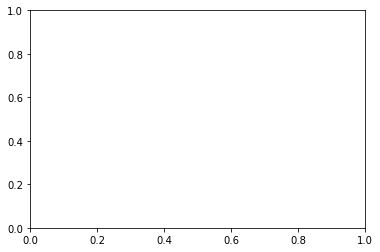

/home/yuanyu/anaconda3/envs/pytorch17/lib/python3.9/site-packages/matplotlib/textpath.py:74: RuntimeWarning: Glyph 26102 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/home/yuanyu/anaconda3/envs/pytorch17/lib/python3.9/site-packages/matplotlib/textpath.py:74: RuntimeWarning: Glyph 38388 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/home/yuanyu/anaconda3/envs/pytorch17/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 26102 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/yuanyu/anaconda3/envs/pytorch17/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 38388 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/yuanyu/anaconda3/envs/pytorch17/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 26102 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/yuanyu/anaco

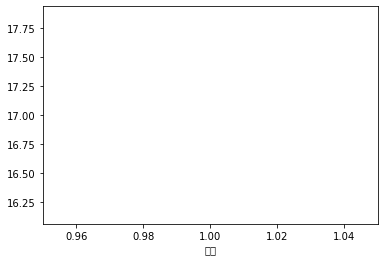

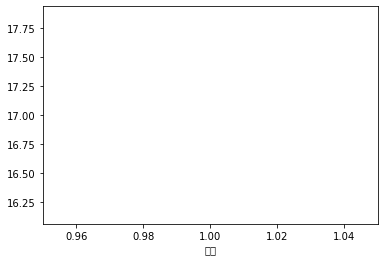

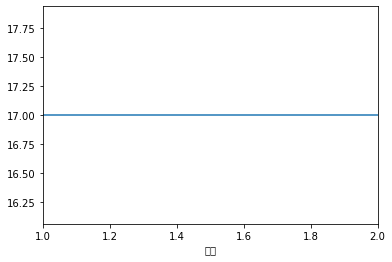

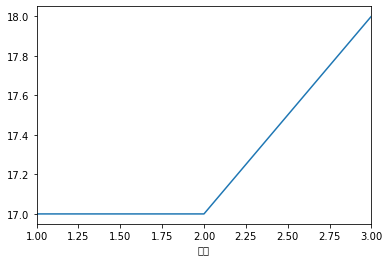

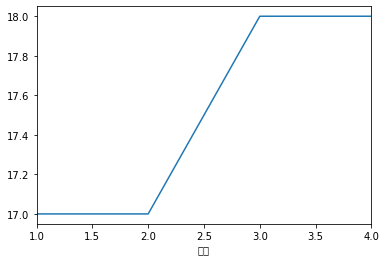

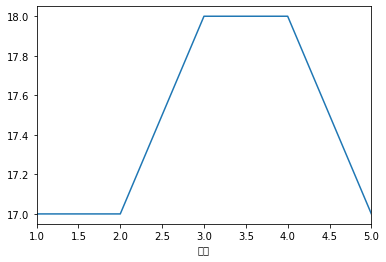

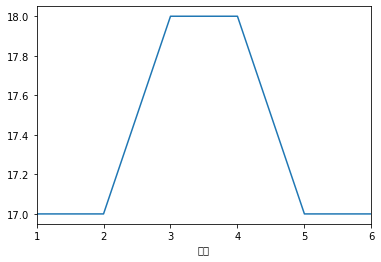

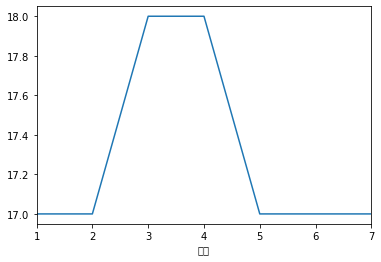

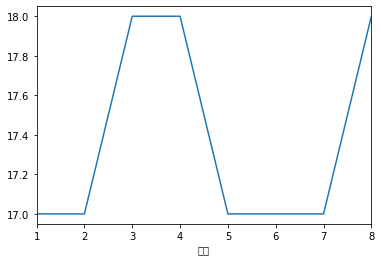

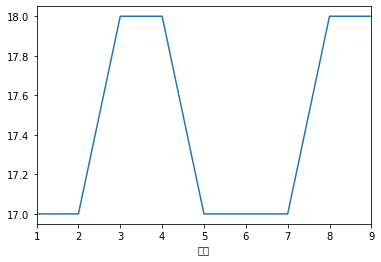

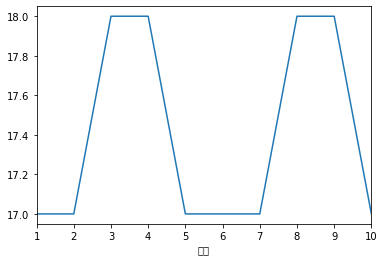

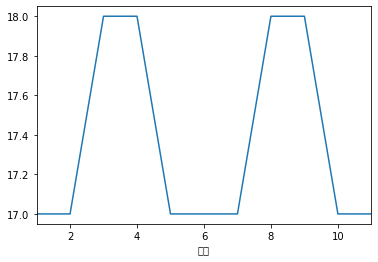

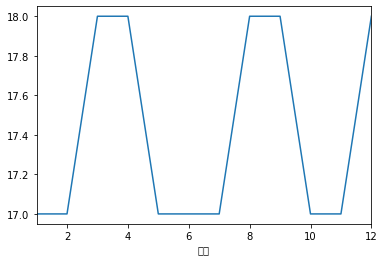

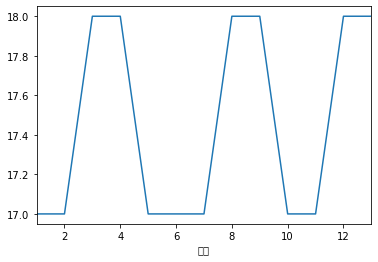

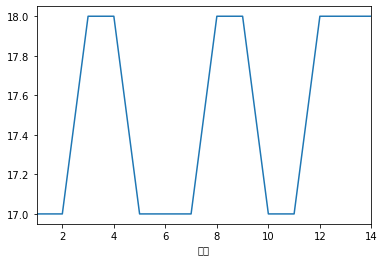

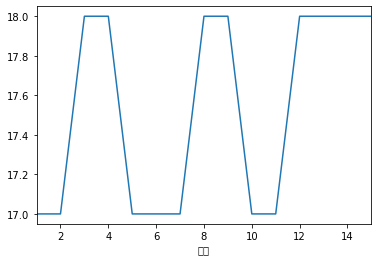

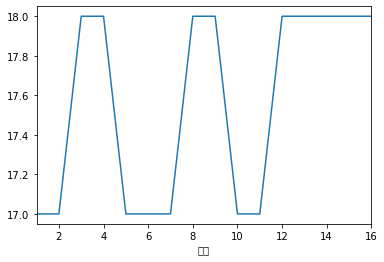

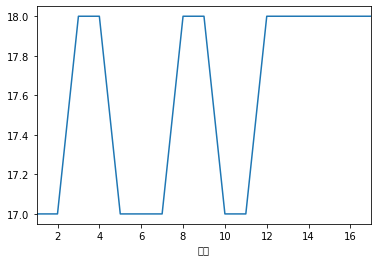

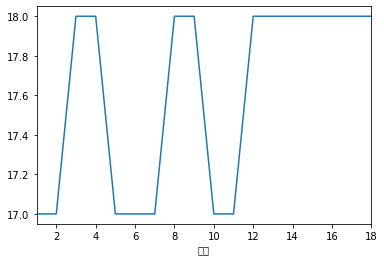

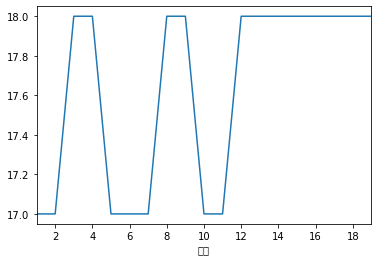

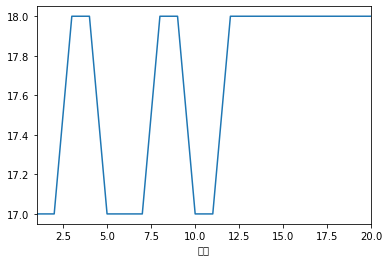

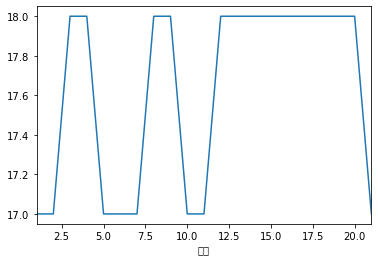

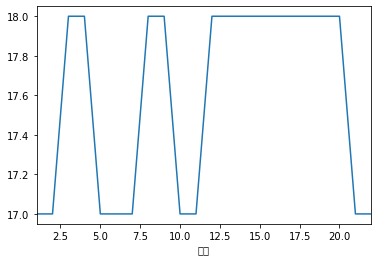

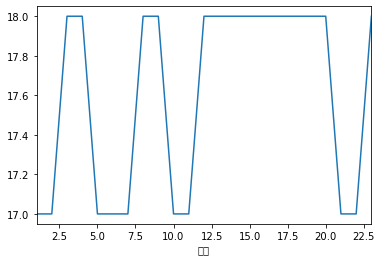

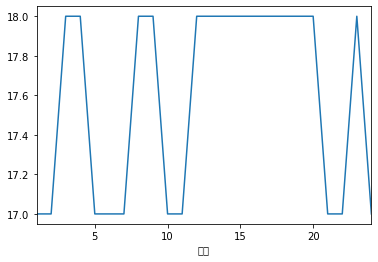

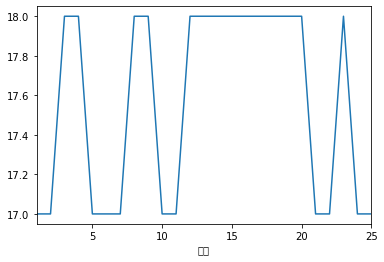

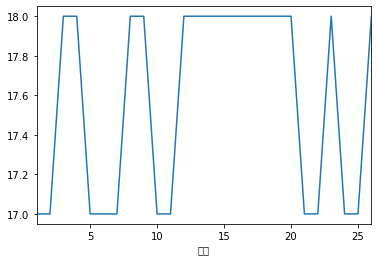

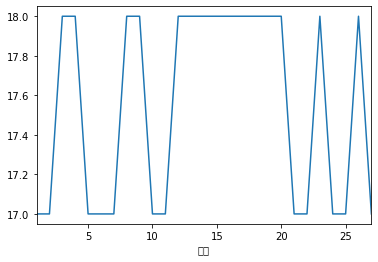

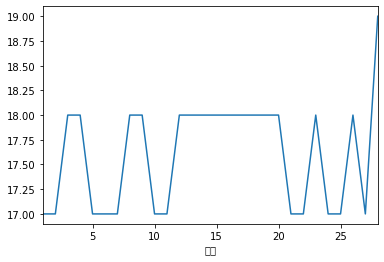

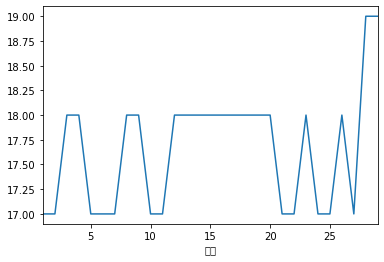

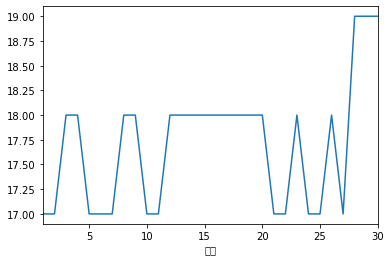

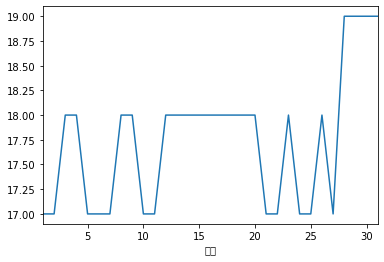

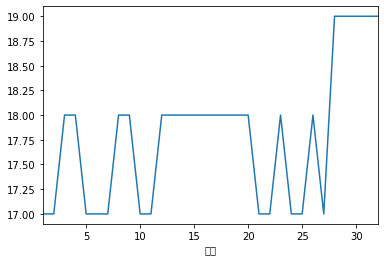

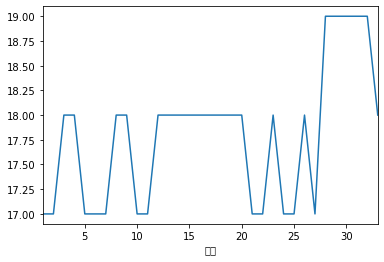

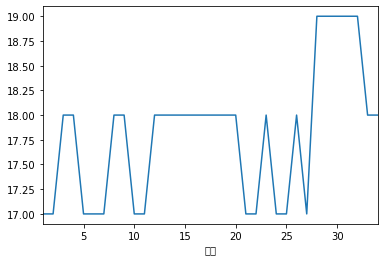

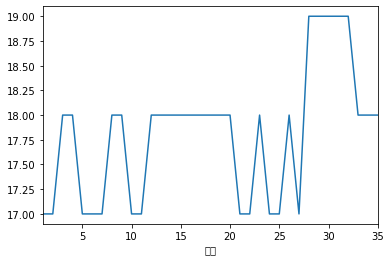

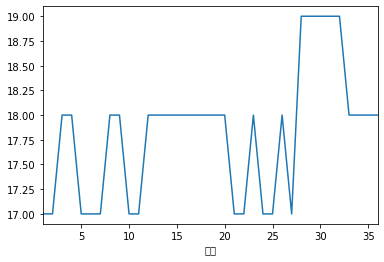

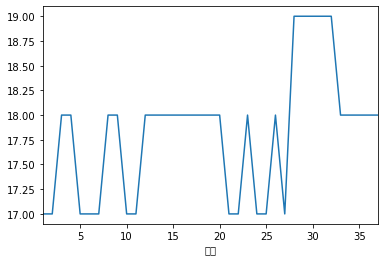

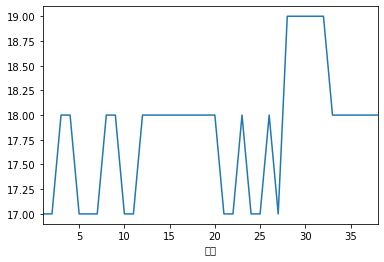

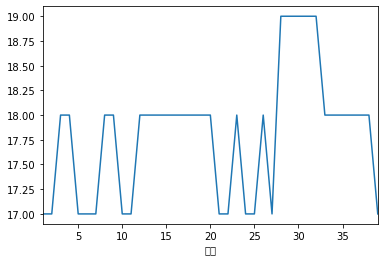

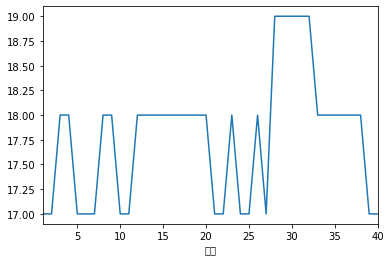

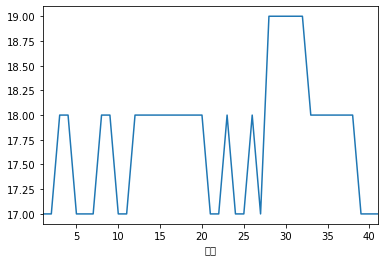

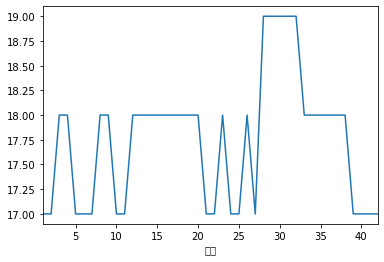

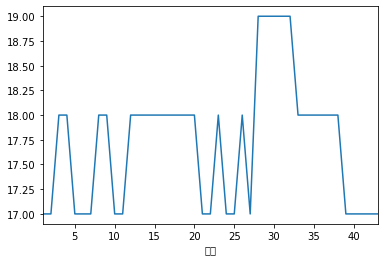

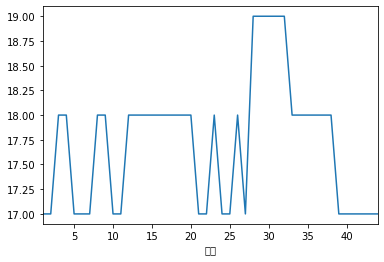

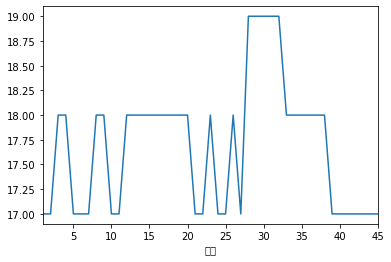

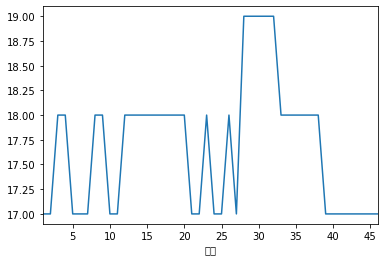

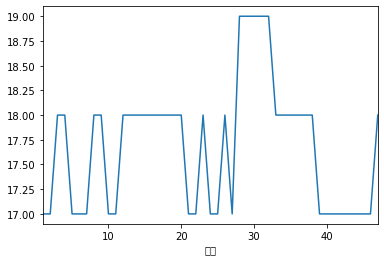

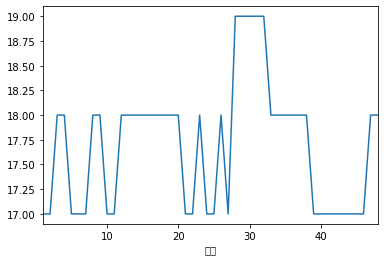

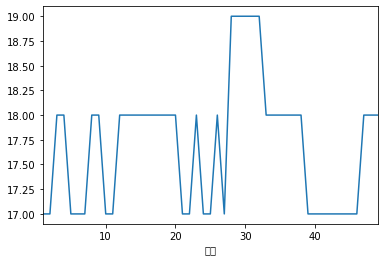

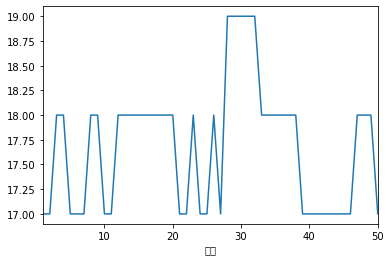

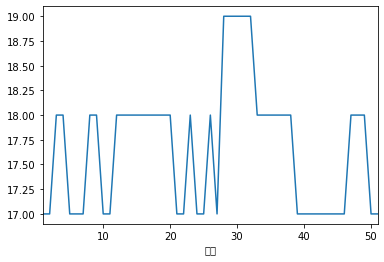

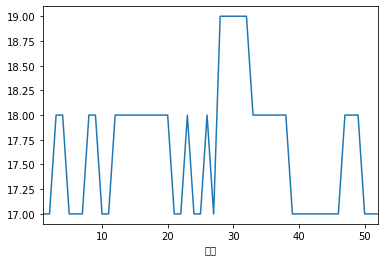

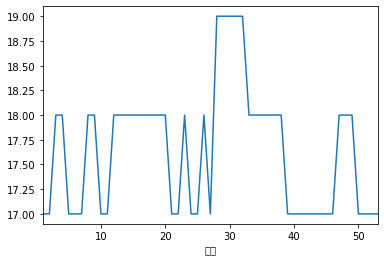

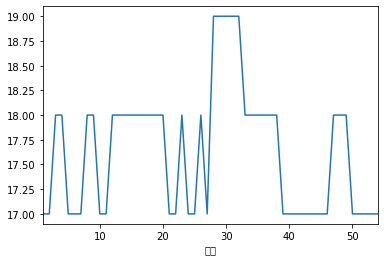

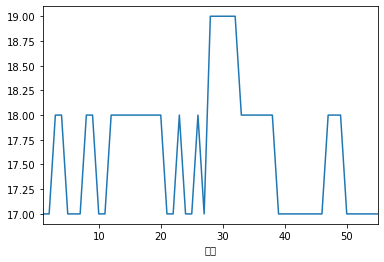

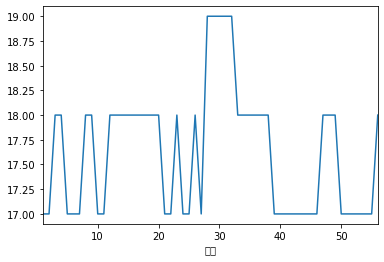

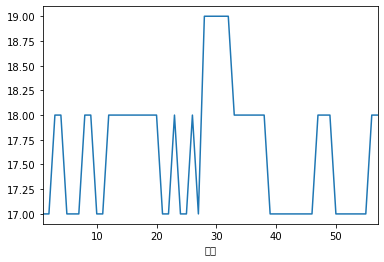

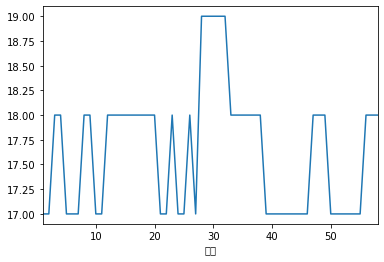

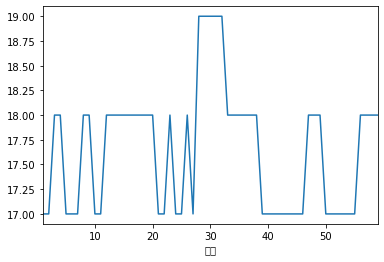

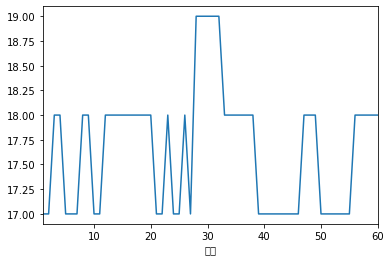

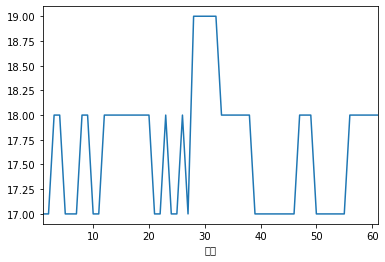

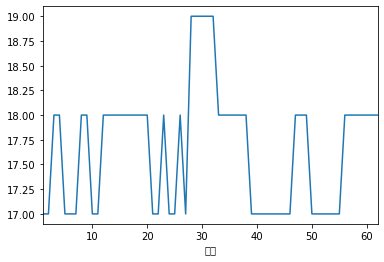

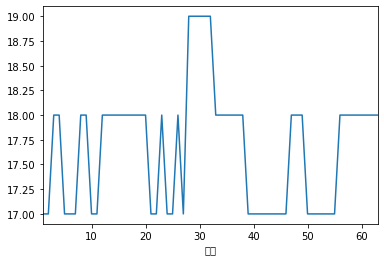

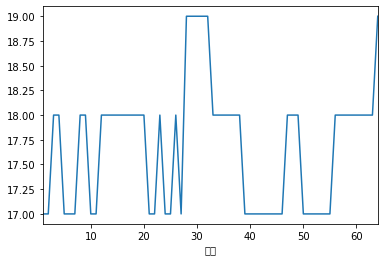

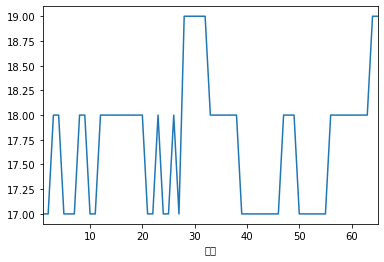

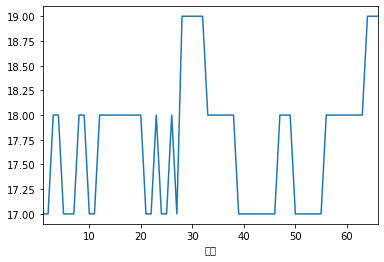

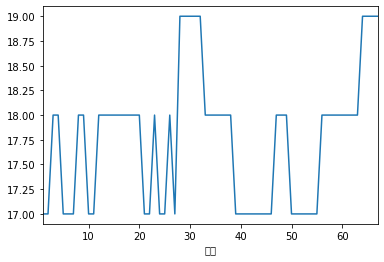

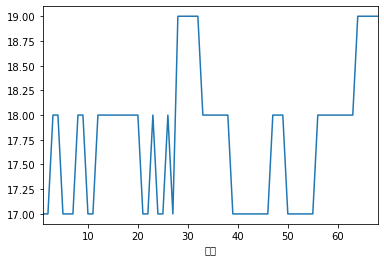

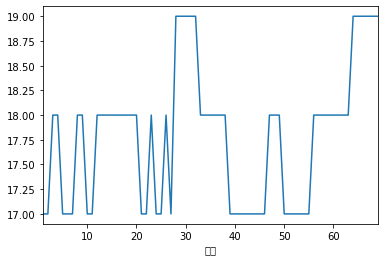

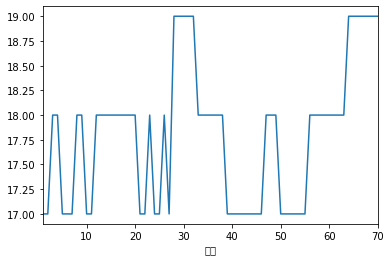

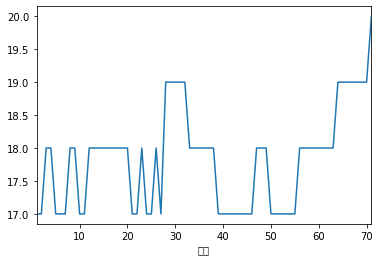

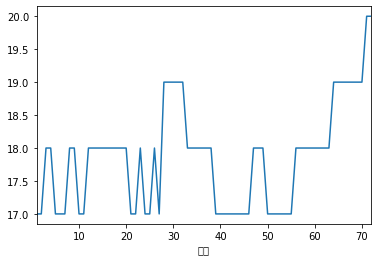

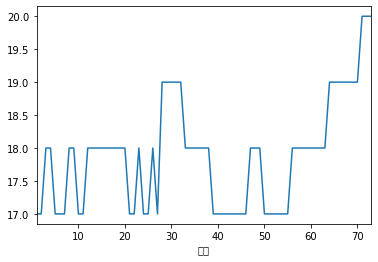

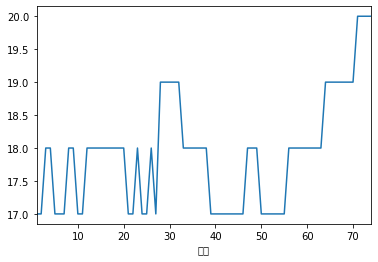

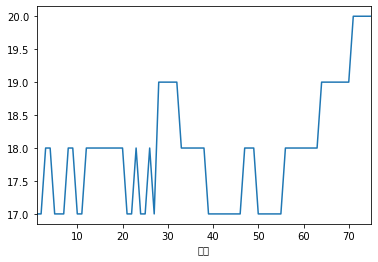

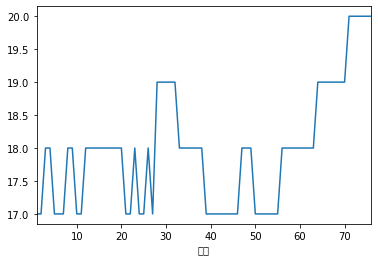

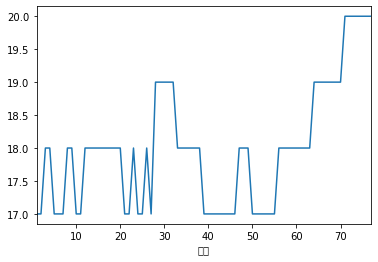

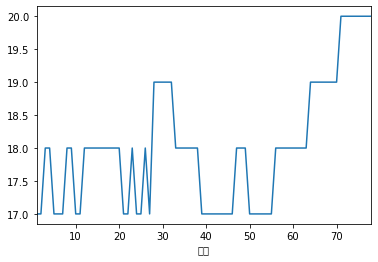

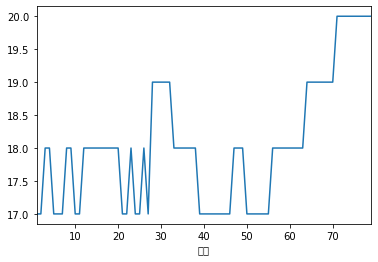

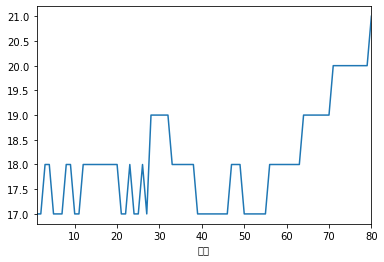

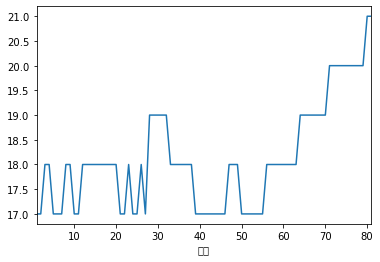

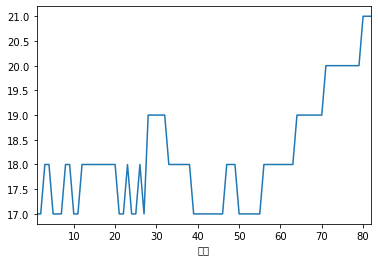

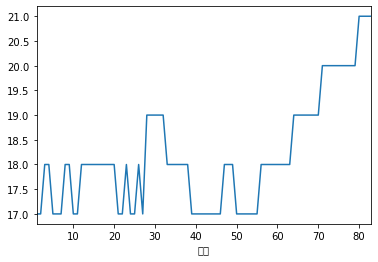

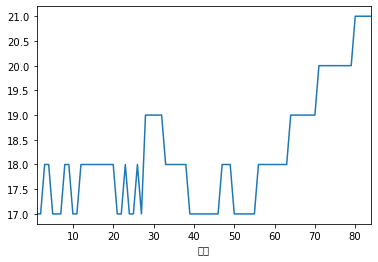

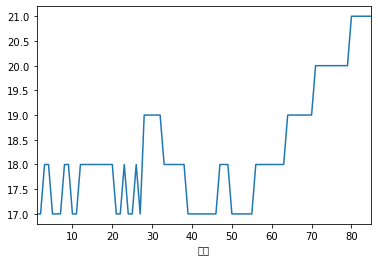

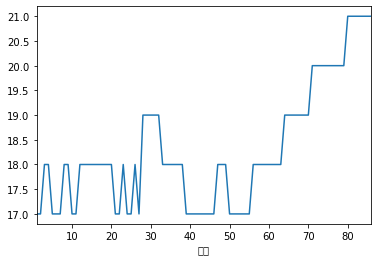

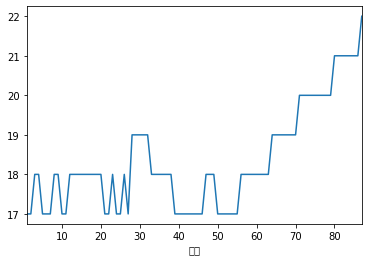

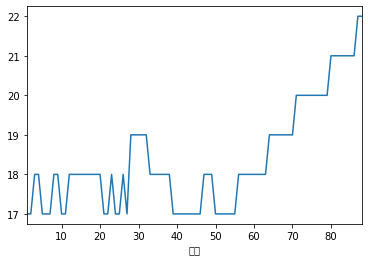

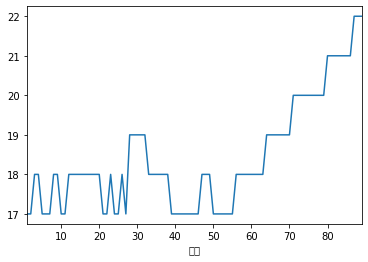

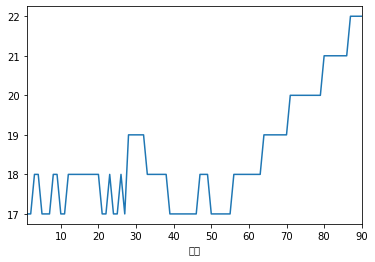

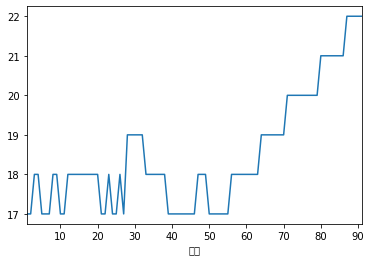

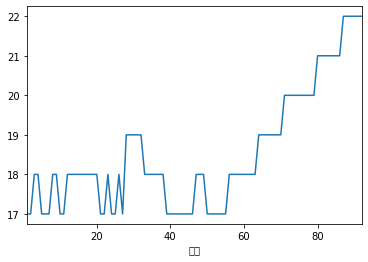

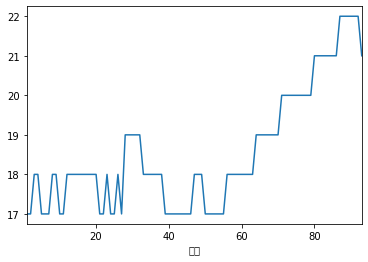

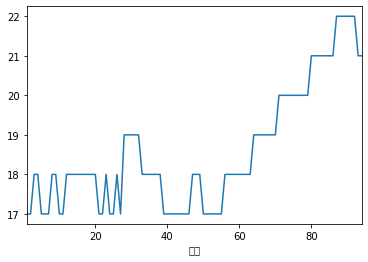

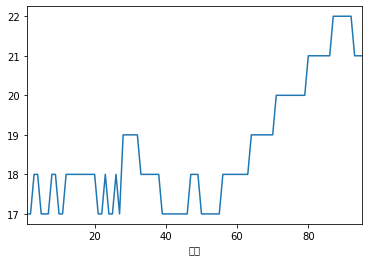

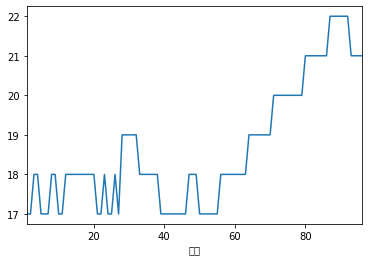

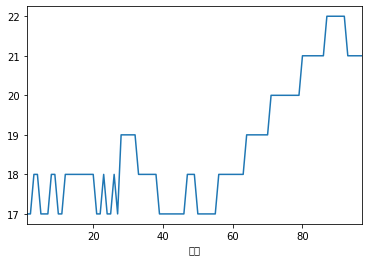

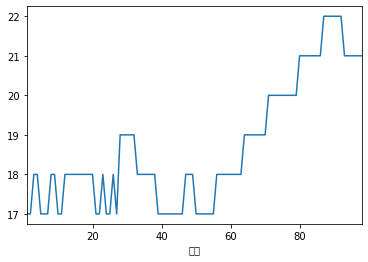

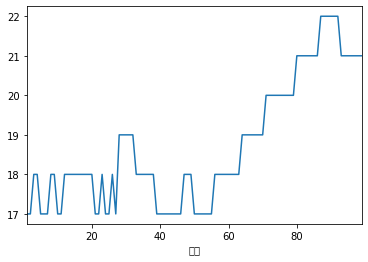

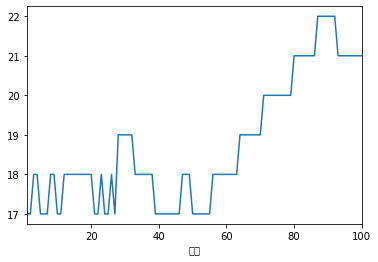

In [7]:
for col_index, col in gas_df.iteritems():
    print(col_index)
    save_path = f'{output_dir}/gas_{col_index}.gif'
    yticks = np.arange(np.min(col)-1, np.max(col)+1, np.max(col)/10)
    plot_and_save_score_gif(col, save_path, yticks)
    break


## 2 火灾中异常气体浓度

In [8]:
gas_df = pd.read_csv(fire_gas_csv, skipinitialspace=True, index_col=0)
gas_df.head()

,PM1,PM10,PM2.5,CH4,H2S,CO,flamGas,Temperature
id,,,,,,,,
1,19,34,24,0,0,0,0,24
2,19,34,24,0,0,0,0,24
3,19,34,24,0,0,0,0,24
4,18,33,23,0,0,0,0,24
5,18,33,23,0,0,0,0,24


PM1
PM10
PM2.5
CH4
H2S
CO
flamGas
Temperature


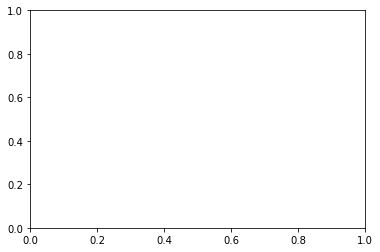

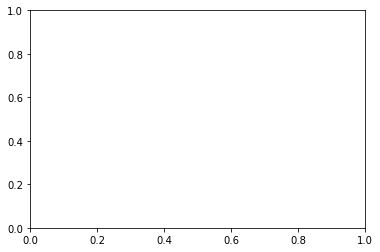

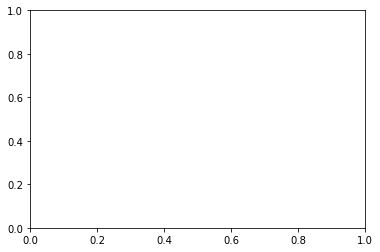

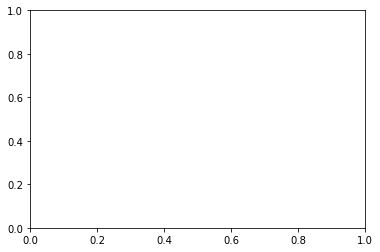

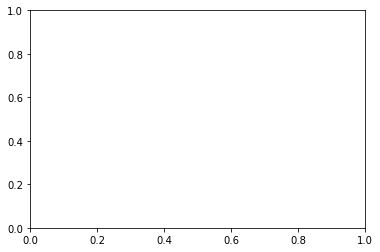

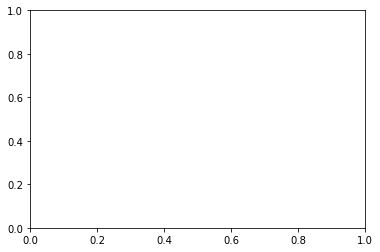

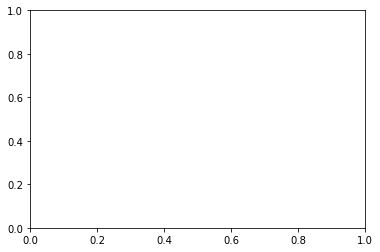

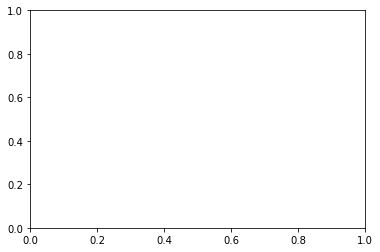

In [9]:
for col_index, col in gas_df.iteritems():
    print(col_index)
    save_path = f'{output_dir}/fire_{col_index}.gif'
    yticks = np.arange(np.min(col)-1, np.max(col)+1, np.max(col)/10)
    plot_and_save_score_gif(col, save_path, yticks)


In [3]:
import datetime
start_dt = datetime.datetime(2017, 1, 1, 20, 10, 10)
interval = datetime.timedelta(seconds=1)
for i in range(24 * 12):
    print((start_dt + interval * i).strftime("%H:%M:%S"))

20:10:10
20:10:11
20:10:12
20:10:13
20:10:14
20:10:15
20:10:16
20:10:17
20:10:18
20:10:19
20:10:20
20:10:21
20:10:22
20:10:23
20:10:24
20:10:25
20:10:26
20:10:27
20:10:28
20:10:29
20:10:30
20:10:31
20:10:32
20:10:33
20:10:34
20:10:35
20:10:36
20:10:37
20:10:38
20:10:39
20:10:40
20:10:41
20:10:42
20:10:43
20:10:44
20:10:45
20:10:46
20:10:47
20:10:48
20:10:49
20:10:50
20:10:51
20:10:52
20:10:53
20:10:54
20:10:55
20:10:56
20:10:57
20:10:58
20:10:59
20:11:00
20:11:01
20:11:02
20:11:03
20:11:04
20:11:05
20:11:06
20:11:07
20:11:08
20:11:09
20:11:10
20:11:11
20:11:12
20:11:13
20:11:14
20:11:15
20:11:16
20:11:17
20:11:18
20:11:19
20:11:20
20:11:21
20:11:22
20:11:23
20:11:24
20:11:25
20:11:26
20:11:27
20:11:28
20:11:29
20:11:30
20:11:31
20:11:32
20:11:33
20:11:34
20:11:35
20:11:36
20:11:37
20:11:38
20:11:39
20:11:40
20:11:41
20:11:42
20:11:43
20:11:44
20:11:45
20:11:46
20:11:47
20:11:48
20:11:49
20:11:50
20:11:51
20:11:52
20:11:53
20:11:54
20:11:55
20:11:56
20:11:57
20:11:58
20:11:59
20:12:00
2